# Finding the Scaling Relations 

### Import dependencies

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from fractions import Fraction
import pickle
import os

### Define Symbols involved

In [21]:
q = Symbol('q')
omega = Symbol('\Omega')
sigma = Symbol('\Sigma')
sigmatot = Symbol('Sigma_tot')
sigmasfr = Symbol('Sigma_SFR')
T = Symbol('T')


# Defining the Constants
calpha = Symbol('C_alpha')
gamma = Symbol('gamma')
boltz = Symbol('k_B')
mu = Symbol('mu')
mh = Symbol('m_H')
G = Symbol('G')
xio = Symbol('xi_0')
delta = Symbol('\delta')
mstar = Symbol('m_*')
cl = Symbol('C_l')
kappa = Symbol('kappa')
mach = Symbol('M')
E51 = Symbol('E_51')
Rk = Symbol('R_k')
psi = Symbol('psi')
kalpha = Symbol('K_alpha')
bet = Symbol('beta')
alphak = Symbol('alpha_k')
Gamma = Symbol('Gamma')


### Constants involved

In [22]:
g_Msun = 1.989e33  # solar mass in g
cgs_G = 6.674e-8  # gravitational constant in cgs units
g_mH = 1.6736e-24  # mass of hydrogen atom in grams
cgs_kB = 1.3807e-16  # boltzmann constant in cgs units

gval, clval, xioval, mstarval, deltaval, e51val, kaval, Gammaval = tuple(
    np.genfromtxt('constants.in', delimiter='=', dtype=np.float64)[:, -1])

const = [(boltz, cgs_kB), (mh, g_mH), (G, cgs_G), (gamma, gval),
         (calpha, 1), (Rk, 0.3), (mu, 14/11), (cl, clval), (xio, xioval), (mstar, mstarval*g_Msun), (delta, deltaval), (E51, e51val), (kalpha, kaval), (Gamma, Gammaval)]


### Choose the model

In [23]:
# quantities = [h, l, u, tau, biso, bani, Bbar, tanpb ]
#comment the code
#make it more understandable for laymen
#some combinations dont work. Give errors for them
model_no = 3
let = 'a'
not_ren = True
from model_generator import  model_gen, bin_data
quantities = model_gen(model_no, let, not_ren)

### Find and plot the scaling relations

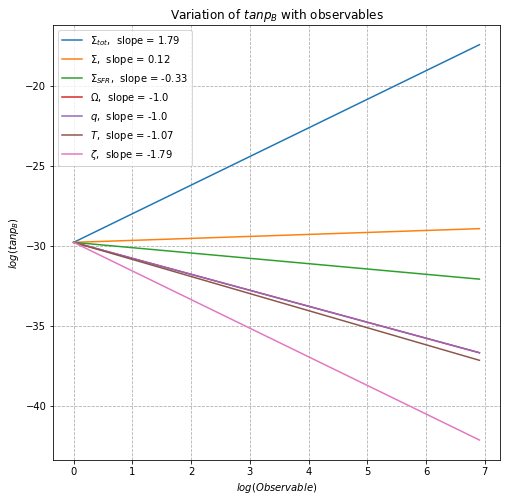

In [26]:
i = 7
s = r'tan p_B'
variables = [(sigmatot, 1), (sigma, 1), (sigmasfr, 1),
            (omega, 1), (q, 1), (T, 1)]
# quantity to be plotted
qu = quantities[i]
# observable to be varied
observ = [variables[i][0] for i in range(len(variables))]
var = np.linspace(1,1000,5000)
# plotting the scaling relations
plt.figure(figsize=(8,8))
for obs in observ:
    variables = [(sigmatot, 1), (sigma, 1), (sigmasfr, 1),
                (omega, 1), (q, 1), (T, 1)]
    variables.remove((obs, 1))
    final = const + variables
    z = qu.subs(final)
    zf = [z.evalf(subs = {obs:i}) for i in var]
    zf = np.array(np.float64(zf))
    if i ==7 :zf =-zf
    po = str(np.round(np.float64(diff(log(z), obs)*obs), 2))
    plt.plot(np.log(var), np.log(zf), label = '$'+str(latex(obs))+'$,  slope = '+po)
plt.title('Variation of $'+s+'$ with observables')
plt.xlabel('$log(Observable)$')
plt.ylabel('$log('+s+')$')
plt.grid(True, which="both", ls="--")
plt.legend()
if i ==6: s = 'Bbar'
#plt.savefig('scal'+s+str(model_no)+let+'.png')

In [25]:
# quantities = [h, l, u, tau, biso, bani, Bbar, tanpb ]
quantities[4]

3.75467400165447e+29*sqrt(6)*pi**(179/153)*xi_0**0.5*(E_51**(64/51)*G*Sigma_SFR*Sigma_tot*\delta/(m_**zeta*(T*gamma*k_B/(m_H*mu))**(2/3)*(G*Sigma_tot*\Sigma*mu/(T*gamma*k_B*zeta))**(76/51)))**(1/3)*sqrt(G*Sigma_tot*\Sigma*m_H*mu/(T*gamma*k_B*zeta))